# Analysis notebook for July Wildtype Cohort (07/2024)

## Description of experiment:  
This cohort was used as a follow up to the previous wildtype cohort trained in March.   
The intentions/ questions were as follows:  
To replicate and increase n number of previous experiments, particularly the 100ms cue presentation experiment.  
To examine changes in performance as mice repeat the 100ms cue task over a number of days (is there learning that changes the peripheral performance?).  
What happens to the peripheral attention as cue presentation time is reduced past 100ms?  
Is the peripheral attention deficit modulated by any aspects about cue presentation?  

## Timeline of experiment:
<pre>
4 days training from 17th - 20th July  
Sunday 21st - no behaviour  
Monday 22nd - 750ms cue presentation time  
       23rd - 500ms  
    24-26th - 100ms (learning experiment)  
       29th - 50ms  
       30th - 25ms  
       31st - 5ms
Monday 5th  - wait catch (2s)
       6th  - wait catch (2s)
       7th  - LED catch (15%)
       8th  - LED catch (15%)
</pre>


In [1]:
# Imports:

%matplotlib inline
from matplotlib import pyplot as plt
from Session_nwb import Session
from pathlib import Path
from Cohort_folder import Cohort_folder
import json
import numpy as np

cohort_directory = Path(r"D:\Behaviour\July_cohort_24\Portable_data")

cohort = Cohort_folder(cohort_directory, multi = True, portable_data = True)
cohort_info = cohort.cohort
phases = cohort.phases()

# Import plotting functions:
import importlib


Loading cohort info...


In [9]:
for session in phases['9c']:
    print(cohort.get_session(session))

{'directory': 'D:\\Behaviour\\July_cohort_24\\Portable_data\\240722_121849\\240722_121902_wtjx300-6a', 'mouse_id': 'wtjx300-6a', 'session_id': '240722_121902_wtjx300-6a', 'portable': True, 'NWB_file': 'D:\\Behaviour\\July_cohort_24\\Portable_data\\240722_121849\\240722_121902_wtjx300-6a\\240722_121902_wtjx300-6a.nwb', 'Behaviour_phase': '9c'}
{'directory': 'D:\\Behaviour\\July_cohort_24\\Portable_data\\240723_122001\\240723_122016_wtjx300-6a', 'mouse_id': 'wtjx300-6a', 'session_id': '240723_122016_wtjx300-6a', 'portable': True, 'NWB_file': 'D:\\Behaviour\\July_cohort_24\\Portable_data\\240723_122001\\240723_122016_wtjx300-6a\\240723_122016_wtjx300-6a.nwb', 'Behaviour_phase': '9c'}
{'directory': 'D:\\Behaviour\\July_cohort_24\\Portable_data\\240724_115532\\240724_115623_wtjx300-6a', 'mouse_id': 'wtjx300-6a', 'session_id': '240724_115623_wtjx300-6a', 'portable': True, 'NWB_file': 'D:\\Behaviour\\July_cohort_24\\Portable_data\\240724_115532\\240724_115623_wtjx300-6a\\240724_115623_wtjx300

In [2]:
# Get sessions for different cue presentation times:

cue_group_750ms = [session for session in phases['9c'] if session[:6] == '240722']
cue_group_500ms = [session for session in phases['9c'] if session[:6] == '240723']

day_1_100ms = [session for session in phases['9c'] if session[:6] == '240724']
day_2_100ms = [session for session in phases['9c'] if session[:6] == '240725']
day_3_100ms = [session for session in phases['9c'] if session[:6] == '240726']

cue_group_50ms = [session for session in phases['9c'] if session[:6] == '240729']
cue_group_25ms = [session for session in phases['9c'] if session[:6] == '240730']
cue_group_5ms = [session for session in phases['9c'] if session[:6] == '240731']

# Catch trial sessions:
wait_catch_day_1 = [session for session in phases['10'] if session[:6] == '240805']
wait_catch_day_2 = [session for session in phases['10'] if session[:6] == '240806']
total_wait_catch = wait_catch_day_1 + wait_catch_day_2

LED_catch_day_1 = [session for session in phases['10'] if session[:6] == '240807']
LED_catch_day_2 = [session for session in phases['10'] if session[:6] == '240808']
total_LED_catch = LED_catch_day_1 + LED_catch_day_2


### Plots plan:
Plot performance during 100ms cue over the three days to see if there's a change in performance.   
If there is a change in performance, pick the last day and plot that.   
If there isn't, group them together and plot that as representative of 100ms cue.   

Then plot all cue times together, from 750 to 5ms, on the same plot.   
For each cue group, import the previous cohorts data and compare, and if similar, group together for one very large cohort plot.   
  
For the catch trials, the goal is to compare the performance in the normal trials to the catch trials. I will need to sort these trials out and bin them seperately, then plot the performance radially as two loops. It may be necessary to group sides. 

### Comparing performance of 100ms days:

In [3]:
# day_1_100ms = [Session(cohort.get_session(session)) for session in day_1_100ms]
day_2_100ms_sessions = [Session(cohort.get_session(session)) for session in day_2_100ms]
day_3_100ms_sessions = [Session(cohort.get_session(session)) for session in day_3_100ms]

Loading session 240725_111831_wtjx300-6a...
Loading session 240725_111831_wtjx300-6b...
Loading session 240725_123634_wtjx307-6c...
Loading session 240725_123635_wtjx307-6a...
Loading session 240725_135903_wtjx307-6b...
Loading session 240725_135903_wtjx261-2a...
Loading session 240725_152746_wtjx261-2b...
Loading session 240725_152746_wtjx262-2a...
Loading session 240725_164514_wtjp254-4a...
Loading session 240725_164514_wtjp254-4b...
Loading session 240726_114619_wtjx300-6a...
Loading session 240726_114619_wtjx300-6b...
Loading session 240726_130152_wtjx307-6c...
Loading session 240726_130152_wtjx307-6a...
Loading session 240726_141523_wtjx307-6b...
Loading session 240726_141523_wtjx261-2a...
Loading session 240726_151233_wtjx261-2b...
Loading session 240726_151233_wtjx262-2a...
Loading session 240726_162241_wtjp254-4a...
Loading session 240726_162241_wtjp254-4b...


In [5]:
import PP_plot_performance

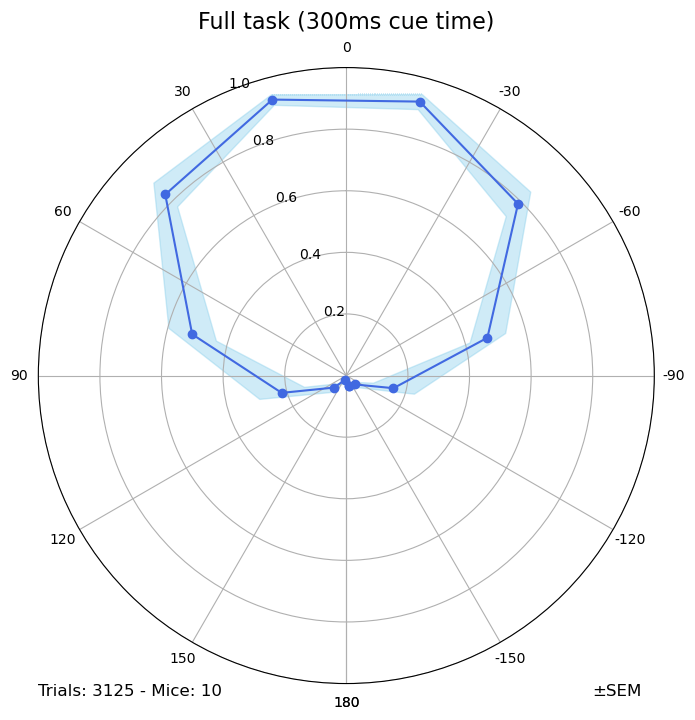

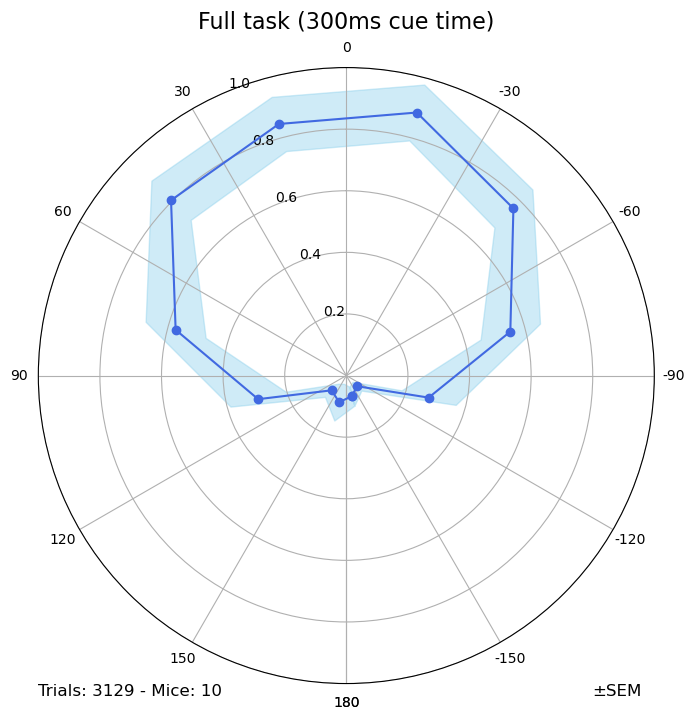

In [7]:
importlib.reload(PP_plot_performance)

PP_plot_performance.plot_performance_by_angle(day_2_100ms, 
                                              title = 'Full task (300ms cue time)', 
                                              bin_mode = 'manual', 
                                              trials_per_bin=100, 
                                              plot_mode='radial', 
                                              cue_mode='both',
                                              error_bars='SEM')

PP_plot_performance.plot_performance_by_angle(day_3_100ms, 
                                              title = 'Full task (300ms cue time)', 
                                              bin_mode = 'manual', 
                                              trials_per_bin=100, 
                                              plot_mode='radial', 
                                              cue_mode='both',
                                              error_bars='SEM')

In [7]:
exclusion_750 = ['240722_182909_wtjp254-4a']
cue_group_750ms_sessions = [Session(cohort.get_session(session)) for session in cue_group_750ms if session not in exclusion_750]
cue_group_500ms_sessions = [Session(cohort.get_session(session)) for session in cue_group_500ms]
day_2_100ms = day_2_100ms
cue_group_50ms_sessions = [Session(cohort.get_session(session)) for session in cue_group_50ms]
cue_group_25ms_sessions = [Session(cohort.get_session(session)) for session in cue_group_25ms]
exclusion_5 = ['240731_170700_wtjp254-4a']
cue_group_5ms_sessions = [Session(cohort.get_session(session)) for session in cue_group_5ms if session not in exclusion_5]

Loading session 240722_121902_wtjx300-6a...
Loading session 240722_121902_wtjx300-6b...
Loading session 240722_133350_wtjx307-6c...
Loading session 240722_133350_wtjx307-6a...
Loading session 240722_144545_wtjx307-6b...
Loading session 240722_144545_wtjx261-2a...
Loading session 240722_165540_wtjx261-2b...
Loading session 240722_165540_wtjx262-2a...
Loading session 240722_182909_wtjp254-4b...
Loading session 240723_122016_wtjx300-6a...
Loading session 240723_122030_wtjx300-6b...
Loading session 240723_133407_wtjx307-6c...
Loading session 240723_133407_wtjx307-6a...
Loading session 240723_144814_wtjx307-6b...
Loading session 240723_144814_wtjx261-2a...
Loading session 240723_162057_wtjx261-2b...
Loading session 240723_161002_wtjx262-2a...
Loading session 240723_162057_wtjx262-2a...
Loading session 240723_173715_wtjp254-4a...
Loading session 240723_173715_wtjp254-4b...
Loading session 240729_100209_wtjx300-6a...
Loading session 240729_100209_wtjx300-6b...
Loading session 240729_111421_wt

In [5]:
import PP_plot_cue_time_experiment 

In [8]:
sessions = [cue_group_750ms_sessions, cue_group_500ms_sessions, day_2_100ms, cue_group_50ms_sessions, cue_group_25ms_sessions, cue_group_5ms_sessions]
cue_times = ['750ms', '500ms', '100ms', '50ms', '25ms', '5ms']

importlib.reload(PP_plot_cue_time_experiment)

PP_plot_cue_time_experiment.plot_performance_by_angle(sessions,
                                                      cue_times,
                                                      title = '',
                                                      bin_mode = 'manual',
                                                      trials_per_bin=100,
                                                      plot_mode='radial',
                                                      error_bars='SEM')

AttributeError: 'str' object has no attribute 'session_dict'